In [10]:
import numpy as np 
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
x_train = np.loadtxt('input.csv',delimiter = ',')
y_train = np.loadtxt('labels.csv',delimiter = ',')

x_test = np.loadtxt('input_test.csv',delimiter = ',')
y_test = np.loadtxt('labels_test.csv',delimiter = ',')

In [12]:
x_train = x_train.reshape(len(x_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)

x_test = x_test.reshape(len(x_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test),1)

x_train = x_train/255.0
x_test = x_test/255.0

#data augmention to improve training
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    zoom_range = 0.2
)

In [13]:
print("Shape of x_train: ",x_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of x_test: ",x_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (2000, 100, 100, 3)
Shape of y_train:  (2000, 1)
Shape of x_test:  (400, 100, 100, 3)
Shape of y_test:  (400, 1)


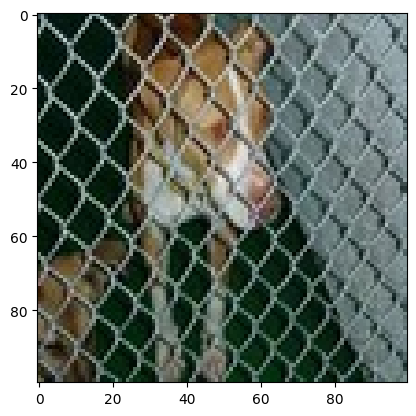

In [14]:
idx = random.randint(0,len(x_train))
plt.imshow(x_train[idx, :])
plt.show()

In [15]:
model = Sequential([
    Conv2D(32,(3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32,(3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1,activation = 'sigmoid')
])

In [16]:
model = Sequential()

model.add(Conv2D(32, (3,2), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2))),
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,2), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2))),
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,2), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2))),
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))


In [17]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.fit(datagen.flow(x_train, y_train, batch_size = 32),
          epochs = 30,
          validation_data = (x_test, y_test),
          verbose = 1)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.5095 - loss: 0.7054 - val_accuracy: 0.5125 - val_loss: 0.6928
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.5190 - loss: 0.6914 - val_accuracy: 0.5650 - val_loss: 0.6858
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.5670 - loss: 0.6845 - val_accuracy: 0.6125 - val_loss: 0.6778
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 222ms/step - accuracy: 0.5625 - loss: 0.6855 - val_accuracy: 0.5825 - val_loss: 0.6764
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 180ms/step - accuracy: 0.5740 - loss: 0.6768 - val_accuracy: 0.6300 - val_loss: 0.6588
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 195ms/step - accuracy: 0.5950 - loss: 0.6659 - val_accuracy: 0.6500 - val_loss: 0.6557
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 175ms/step - accuracy: 0.6230 - loss: 0.6553 - val_accuracy: 0.7125 - val_loss: 0.6077
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 180ms/step - accuracy: 0.6210 - loss: 0.6554 - val_accuracy: 

In [ ]:
model.evaluate(x_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8050 - loss: 0.4141


[0.41413336992263794, 0.8050000071525574]

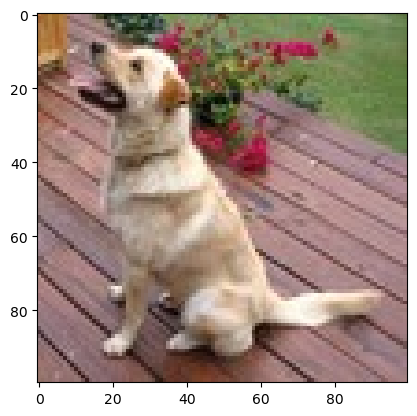

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Our model says it is a:  cat


In [ ]:
indx2 = random.randint(0,len(y_test))
plt.imshow(x_test[indx2, :])
plt.show()

y_pred = model.predict(x_test[indx2, :].reshape(1,100,100,3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a: ", pred)

In [ ]:
model.save('model.h5')
print("saved model to disk")

saved model to disk
